# SMS SPAM DETECTION

### Bayes' theorem

Formula :- 

P(A | B) = P(B|A).P(A) / P(B)

A, B = events

P(A|B) = probability of A given B is true

P(B|A) = probability of B given A is true

P(A), P(B) = the independent probabilities of A and B

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np

import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Read the Dataset

In [2]:
df = pd.read_csv('C:/Users/sanso/Desktop/CODSOFT/SMS SPAM DETECTION/Sms Spam Dataset/spam.csv', encoding="ISO-8859-1")

# The UnicodeDecodeError suggests that the CSV file contains characters that are not encoded in UTF-8. 
# To handle this, we can specify a different encoding when reading the file with pandas. 
# A common alternative encoding for CSV files is ISO-8859-1 (also known as latin1).
# Here's how you can read the CSV file using ISO-8859-1 encoding.

## Explore the Dataset

In [3]:
print("No of rows: ", len(df))

No of rows:  5572


In [4]:
print("Look at the dataset: ")
df.head()

Look at the dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
print("="*50)
print("First Five Rows", "\n")
print(df.head(5), "\n")

print("="*50)
print("Information About Dataset", "\n")
print(df.info(), "\n")

print("="*50)
print("Describe the Dataset", "\n")
print(df.describe(), "\n")

print("="*50)
print("Null Values", "\n")
print(df.isnull().sum(), "\n")

First Five Rows 

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unname

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [8]:
df.columns = ['Category', 'Message']

In [9]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# df['Category'].value_counts()
df.Category.value_counts()

# We can write any one of this.

Category
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
df.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5169,"Sorry, I'll call later",30


In [14]:
df['length'] = df['Message'].apply(len)
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Plotting The Dataset

<Axes: ylabel='Frequency'>

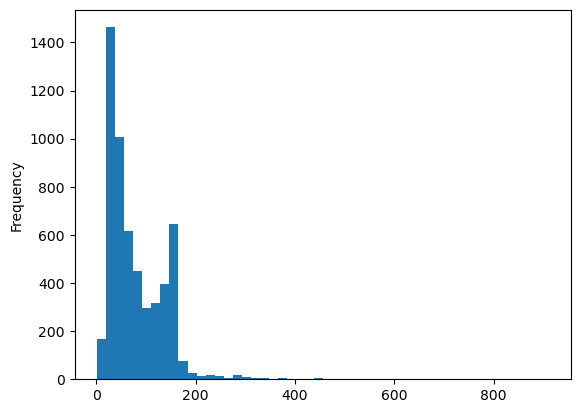

In [15]:
df['length'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

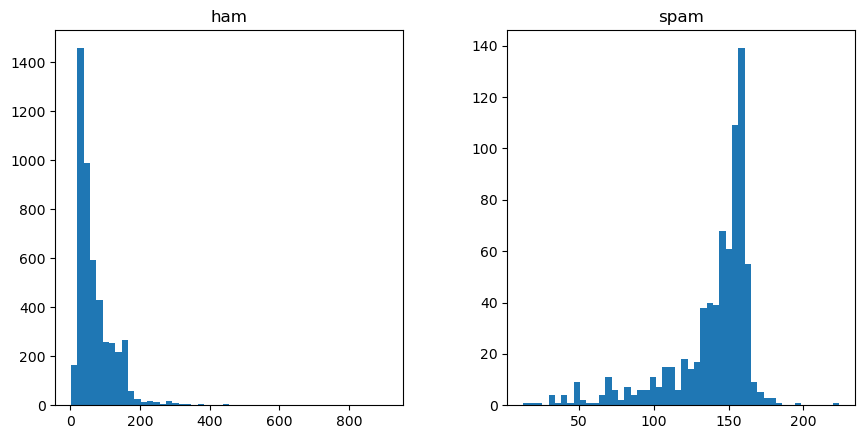

In [16]:
df.hist(column = 'length', by = 'Category', bins = 50, figsize = (10, 5), rot = 0)

<Axes: xlabel='Category'>

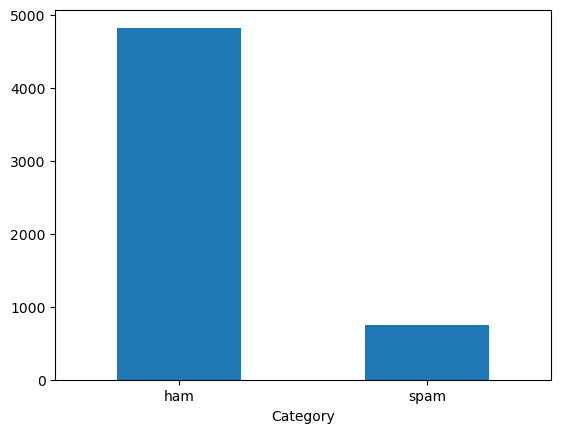

In [17]:
df['Category'].value_counts().plot(kind='bar', rot = 0)

In [18]:
df['Spam'] = df['Category'].apply(lambda x:1 if x == 'spam' else 0)

In [19]:
df.head(10)

,Category,Message,length,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WINNER!! As a valued network customer you have...,158,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1


In [20]:
X = df["Message"]
y = df["Spam"]

cv = CountVectorizer()

x = cv.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [21]:
# x_train = cv.fit_transform(x_train)

# x_test = cv.fit_transform(x_test)

In [22]:
print(x_train.shape)
print(x_test.shape)

(4457, 8672)
(1115, 8672)


In [23]:
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)


In [24]:
print(x.shape)
print(y.shape)

(5572, 8672)
(5572,)


In [25]:
x_train

<4457x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [26]:
x_test

<1115x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 14938 stored elements in Compressed Sparse Row format>

# Implementation of ML Model

## Implementation of Multinomial NB Model

In [27]:
model1 = MultinomialNB()
model1.fit(x_train, y_train)

MultinomialNB()

In [28]:
prediction1 = model1.predict(x_test)

In [29]:
print(prediction1)

[1 0 1 ... 0 0 1]


In [30]:
sample1 = input("Enter a message: ")

data1 = cv.transform([sample1]).toarray()

print(model1.predict(data1))

Enter a message:  Free entry in 2 a wkly comp to win FA Cup 


[1]


#### Here [0] means not spam sms and [1] means spam sms.

In [31]:
# We can also check accuracy by this method
model1.score(x_test, y_test)

0.97847533632287

In [32]:
print("MODEL 1 Multinomial NB: \n")
print("Accuracy score: {}\n".format(accuracy_score(y_test, prediction1)))
print("Precision score: {}\n".format(precision_score(y_test, prediction1)))
print("Recall score: {}\n".format(recall_score(y_test, prediction1)))
print("F1 score: {}".format(f1_score(y_test, prediction1)))

MODEL 1 Multinomial NB: 

Accuracy score: 0.97847533632287

Precision score: 0.9144736842105263

Recall score: 0.9266666666666666

F1 score: 0.9205298013245033


## Implementation of Bernoulli NB Model

In [33]:
model2 = BernoulliNB()
model2.fit(x_train, y_train)

BernoulliNB()

In [34]:
prediction2 = model2.predict(x_test)
print(prediction2)

[0 0 1 ... 0 0 1]


In [35]:
sample2 = input("Enter a message: ")

data2 = cv.transform([sample2]).toarray()

print(model2.predict(data2))

Enter a message:  Even my brother is not like to speak with me.


[0]


#### Here [0] means not spam sms and [1] means spam sms.

In [36]:
model2.score(x_test, y_test)

0.97847533632287

In [37]:
print("Model 2 Bernoulli NB: \n")
print("Accuracy score: {}\n".format(accuracy_score(y_test, prediction2)))
print("Precision score: {}\n".format(precision_score(y_test, prediction2)))
print("Recall score: {}\n".format(recall_score(y_test, prediction2)))
print("F1 score: {}".format(f1_score(y_test, prediction2)))

Model 2 Bernoulli NB: 

Accuracy score: 0.97847533632287

Precision score: 0.9921875

Recall score: 0.8466666666666667

F1 score: 0.9136690647482014


## Implementation of MLP Classifier Model

In [38]:
model3 = MLPClassifier()
model3.fit(x_train, y_train)

MLPClassifier()

In [39]:
prediction3 = model3.predict(x_test)
print(prediction3)

[0 0 1 ... 0 0 1]


In [40]:
print("Model 3 MLP Classifier: \n")
print("Accuracy score: {}\n".format(accuracy_score(y_test, prediction3)))
print("Precision score: {}\n".format(precision_score(y_test, prediction3)))
print("Recall score: {}\n".format(recall_score(y_test, prediction3)))
print("F1 score: {}".format(f1_score(y_test, prediction3)))

Model 3 MLP Classifier: 

Accuracy score: 0.9802690582959641

Precision score: 1.0

Recall score: 0.8533333333333334

F1 score: 0.9208633093525179
